In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots


# **LOAD DATA**

In [3]:
data = pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")

# **EDA**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [6]:
data.shape

(6819, 96)

In [7]:
data.describe

<bound method NDFrame.describe of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after

In [8]:
data.sample(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1153,0,0.494321,0.568524,0.545693,0.611013,0.611013,0.999007,0.797615,0.809506,0.303838,...,0.817977,0.006185,0.624001,0.611009,0.841242,0.275930,0.026792,0.565161,1,0.087776
5788,0,0.544825,0.599433,0.586380,0.599519,0.599540,0.999039,0.797464,0.809366,0.303510,...,0.823129,0.003407,0.624175,0.599520,0.844456,0.291475,0.027043,0.566130,1,0.015996
6329,0,0.503973,0.557894,0.540554,0.597839,0.597839,0.999000,0.797412,0.809323,0.303498,...,0.813093,0.000725,0.623663,0.597837,0.842005,0.284579,0.026872,0.565518,1,0.020012
2902,0,0.526642,0.558003,0.574763,0.617348,0.615784,0.998995,0.797444,0.809374,0.303564,...,0.808799,0.003538,0.623541,0.617343,0.841453,0.283901,0.027075,0.566224,1,0.020732
1569,0,0.490128,0.553751,0.536645,0.598373,0.598373,0.998995,0.797411,0.809328,0.303509,...,0.807528,0.001236,0.623896,0.598369,0.841940,0.291699,0.026972,0.565893,1,0.015920


In [9]:
data.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [10]:
data.isna().any()

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
                                                            ...  
 Liability to Equity                                        False
 Degree of Financial Leverage (DFL)                         False
 Interest Coverage Ratio (Interest expense to EBIT)         False
 Net Income Flag                                            False
 Equity to Liability                                        False
Length: 96, dtype: bool

In [11]:
data.duplicated().any()

False

In [12]:
data['Bankrupt?'].unique()

array([1, 0])

# DATA VISUALISATION

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



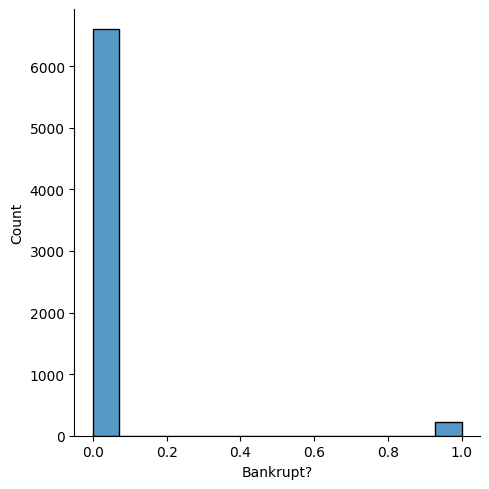

In [13]:
sns.displot(data['Bankrupt?'])

# **DATA PREPROCESSING**

In [14]:
x = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder_x = LabelEncoder()

In [17]:
for col in x.columns:
    x[col]=encoder_x.fit_transform(x[col])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

In [20]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (4773, 95)
y_train shape =  (4773,)
x_test shape =  (2046, 95)
y_test shape =  (2046,)


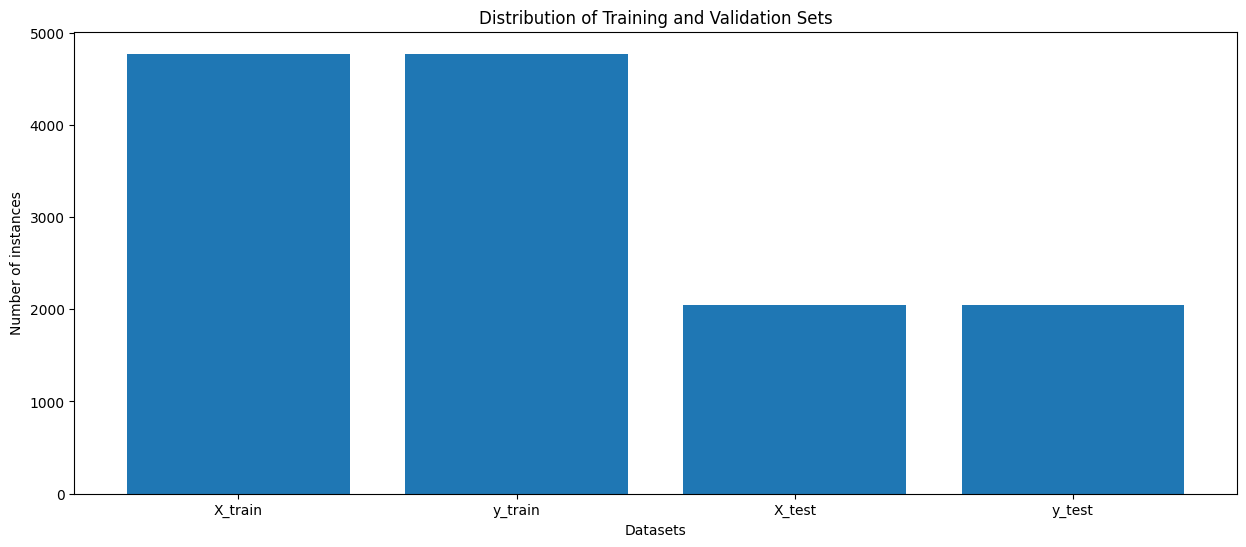

In [21]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(15, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

# **SCALING DATA**

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# **LOGISTIC REGRESSION MODEL**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr_model=LogisticRegression()

In [27]:
lr_model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [28]:
y_pred=lr_model.predict(x_test)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
con= confusion_matrix(y_test,y_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis

<Axes: >

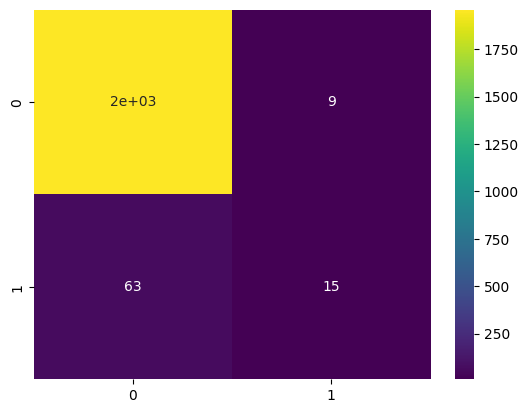

In [32]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

In [33]:
from sklearn.metrics import classification_report # for Precision and Recall Analysis

In [34]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.62      0.19      0.29        78

    accuracy                           0.96      2046
   macro avg       0.80      0.59      0.64      2046
weighted avg       0.96      0.96      0.96      2046



# **SVM**

In [35]:
from sklearn.svm import SVC

In [36]:
from sklearn.svm import SVC ## call model 

In [37]:
svm_model =SVC()

In [38]:
svm_model.fit(x_train, y_train)

SVC()

In [39]:
y_pred = svm_model.predict(x_test)

In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.96      1.00      0.98      1968
           1       1.00      0.01      0.03        78

    accuracy                           0.96      2046
   macro avg       0.98      0.51      0.50      2046
weighted avg       0.96      0.96      0.94      2046



# **DECISION TREE MODEL**

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt_model = DecisionTreeClassifier()

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40]
}

In [46]:
grid_search = GridSearchCV(dt_model, params, cv = 5 )

In [47]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 30, 40]})

In [48]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 30}


In [49]:
print(grid_search.best_score_)

0.9712966072859386


In [50]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)

In [51]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=30)

In [52]:
dt_pred = dt_model.predict(x_test)

In [53]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
train_dt_pred = dt_model.predict(x_train)

In [55]:
print("Testing Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_test, dt_pred))

Testing Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.48      0.21      0.29        78

    accuracy                           0.96      2046
   macro avg       0.73      0.60      0.63      2046
weighted avg       0.95      0.96      0.95      2046



In [56]:
print("Training Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_train, train_dt_pred))

Training Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4631
           1       0.69      0.39      0.50       142

    accuracy                           0.98      4773
   macro avg       0.84      0.69      0.75      4773
weighted avg       0.97      0.98      0.97      4773

